In [1]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [2]:
import pandas as pd
df=pd.read_csv('data.csv')
df= df.sort_values(by = 'moisture')

In [3]:
x=df['moisture']

In [4]:
z=df['pump']

In [5]:
df= df.sort_values(by = 'temp')

In [6]:
y=df['temp']

In [7]:
moist=ctrl.Antecedent(x,'moist')
temp=ctrl.Antecedent(y,'temp')
pump=ctrl.Consequent(z,'pump')

In [8]:
moist.automf(5)
temp.automf(5)
pump.automf(5)

D:\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


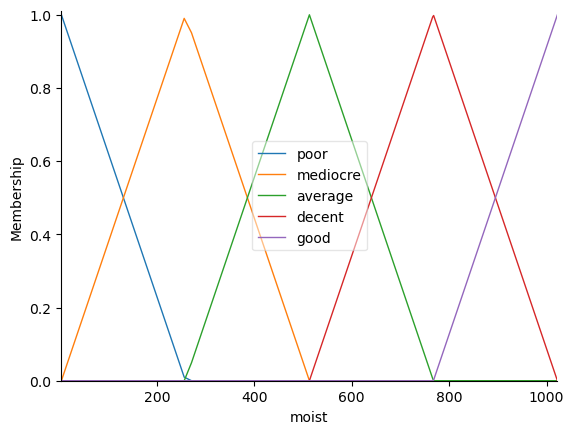

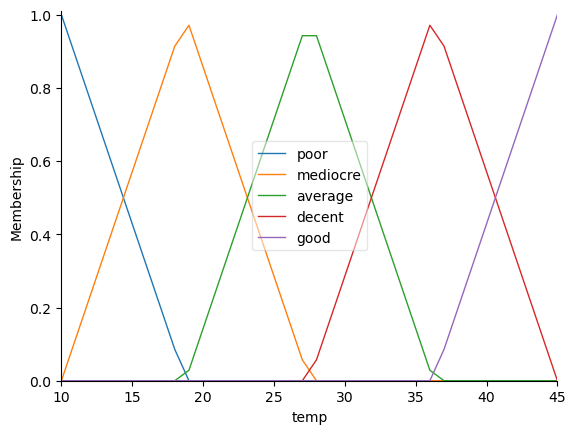

In [9]:
moist.view()
temp.view()

In [10]:
r1=ctrl.Rule(moist['poor'] & temp['good'],pump['good'])
r2=ctrl.Rule(moist['poor'] & temp['decent'],pump['decent'])
r3=ctrl.Rule(moist['poor'] & temp['average'],pump['average'])
r4=ctrl.Rule(moist['poor'] & temp['mediocre'],pump['average'])
r5=ctrl.Rule(moist['poor'] & temp['poor'],pump['average'])

In [11]:
r6=ctrl.Rule(moist['mediocre'] & temp['good'],pump['good'])
r7=ctrl.Rule(moist['mediocre'] & temp['decent'],pump['decent'])
r8=ctrl.Rule(moist['mediocre'] & temp['average'],pump['decent'])
r9=ctrl.Rule(moist['mediocre'] & temp['mediocre'],pump['average'])
r10=ctrl.Rule(moist['mediocre'] & temp['poor'],pump['average'])

In [12]:
r11=ctrl.Rule(moist['average'] & temp['average'],pump['average'])
r12=ctrl.Rule(moist['average'] & temp['poor'],pump['mediocre'])
r13=ctrl.Rule(moist['average'] & temp['good'],pump['decent'])
r14=ctrl.Rule(moist['average'] & temp['mediocre'],pump['average'])
r15=ctrl.Rule(moist['average'] & temp['decent'],pump['decent'])

In [13]:
r16=ctrl.Rule(moist['decent'] & temp['average'],pump['average'])
r17=ctrl.Rule(moist['decent'] & temp['poor'],pump['poor'])
r18=ctrl.Rule(moist['decent'] & temp['good'],pump['good'])
r19=ctrl.Rule(moist['decent'] & temp['mediocre'],pump['mediocre'])
r20=ctrl.Rule(moist['decent'] & temp['decent'],pump['decent'])

In [14]:
r21=ctrl.Rule(moist['good'] & temp['good'],pump['poor'])
r22=ctrl.Rule(moist['good'] & temp['poor'],pump['poor'])
r23=ctrl.Rule(moist['good'] & temp['average'],pump['poor'])
r24=ctrl.Rule(moist['good'] & temp['mediocre'],pump['poor'])
r25=ctrl.Rule(moist['good'] & temp['decent'],pump['poor'])

In [15]:
con_temp=ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r13,r14,r15,r16,r17,r18,r19,r20,r21,r23,r24,r25])

In [16]:
detect=ctrl.ControlSystemSimulation(con_temp)

In [17]:
detect.input['moist']=900
detect.input['temp']=50

In [18]:
detect.compute()

In [19]:
detect.output['pump']

0.4931237721021611

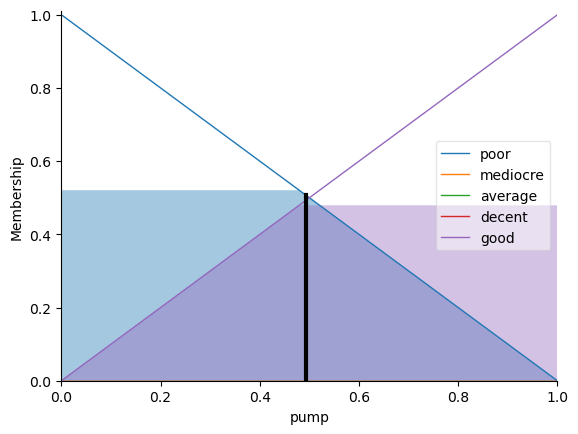

In [20]:
pump.view(sim=detect)